<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Модель-для-этапа-флотации" data-toc-modified-id="Модель-для-этапа-флотации-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель для этапа флотации</a></span></li><li><span><a href="#Модель-для-этапа-очистки" data-toc-modified-id="Модель-для-этапа-очистки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель для этапа очистки</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [198]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

In [199]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
numerical_methods

In [200]:
try:
    df_train=pd.read_csv('datasets\gold_recovery_train_new.csv',index_col='date')
    df_test=pd.read_csv('datasets\gold_recovery_test_new.csv',index_col='date')
    df=pd.read_csv('datasets\gold_recovery_full_new.csv',index_col='date')
except:
    df_train=pd.read_csv('/datasets/gold_recovery_train_new.csv',index_col='date')
    df_test=pd.read_csv('/datasets/gold_recovery_test_new.csv',index_col='date')
    df=pd.read_csv('/datasets/gold_recovery_full_new.csv',index_col='date')

In [201]:
df_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [202]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [203]:
df_train['rougher.output.recovery.chek']=(df_train['rougher.output.concentrate_au']*(df_train['rougher.input.feed_au']-df_train['rougher.output.tail_au'])
                                         )/(df_train['rougher.input.feed_au']*(df_train['rougher.output.concentrate_au']-df_train['rougher.output.tail_au']))*100

In [204]:
print(mean_absolute_error(df_train['rougher.output.recovery.chek'], df_train['rougher.output.recovery']))

9.73512347450521e-15


Ошибка - очень малое число, следовательно расчёт эффективности обогащения произведён верно. Проверочный столбец удалим.

In [205]:
df_train.drop('rougher.output.recovery.chek', axis= 1,inplace= True)

In [206]:
#найдём признаки, которые есть в обучающей выборке и нет в тестовой
test=df_test.columns.to_numpy()
train=df_train.columns.to_numpy()
[x for x in train if x not in test]

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовой выборке у нас нет финальных характеристик, параметров продуктов и "хвостов" после этапов очистки. Т.к. модель должна прогнозировать на тестовой выборке, то и обучать мы её будем на признаках, которые есть в тестовой выборке.

In [207]:
#создадим отдельный фрейм с набором признаков как в тесте
df_train_new=df_train[test]

In [208]:
df_train_new.ffill(axis=0, inplace=True)

In [209]:
df_test.ffill(axis=0, inplace=True)

In [211]:
#Разделим выборку. Нам нужно будет строить 2 модели, то и данные разбиваем на 2 набора. 
target_rougher_train = df_train['rougher.output.recovery']
target_final_train = df_train['final.output.recovery']
features_rougher_train=df_train_new[['rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level']]
features_cleaner_train=df_train_new[[
    'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level','secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level'
    ]]

In [212]:
#Тоже самое сделаем для тестовой выборки
target_rougher_test = df.loc[df_test.index,'rougher.output.recovery']
target_final_test =  df.loc[df_test.index,'final.output.recovery']
features_rougher_test=df_test[['rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level']]
features_cleaner_test=df_test[[
    'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level','secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level'
    ]]

Т.к. один из алгоритмов линейная регрессия, то нормируем признаки

In [214]:
print(df['rougher.output.recovery'].isna().sum(),df['final.output.recovery'].isna().sum())

0 0


В целевых у нас пропусков нет.

In [215]:
print(df[df['rougher.output.recovery']==0]['rougher.output.recovery'].count(),
      df[df['final.output.recovery']==0]['final.output.recovery'].count())

394 98


А вот нули есть. Расчёт метрики sMAPE предполагает, что таргет стит в знаменателе дроби, следовательно ошибка будет стремиться к бесконечности на данных примерах. Данные записи удалим. 

In [216]:
target_rougher_train=target_rougher_train[target_rougher_train!=0]
target_rougher_test=target_rougher_test[target_rougher_test!=0]
target_final_train = target_final_train[target_final_train!=0]
target_final_test = target_final_test[target_final_test!=0]

In [217]:
features_rougher_train=features_rougher_train.loc[target_rougher_train.index]
features_rougher_test=features_rougher_test.loc[target_rougher_test.index]
features_cleaner_train=features_cleaner_train.loc[target_final_train.index]
features_cleaner_test=features_cleaner_test.loc[target_final_test.index]

## Анализ данных

Посомтрим на изменение концетрации металов

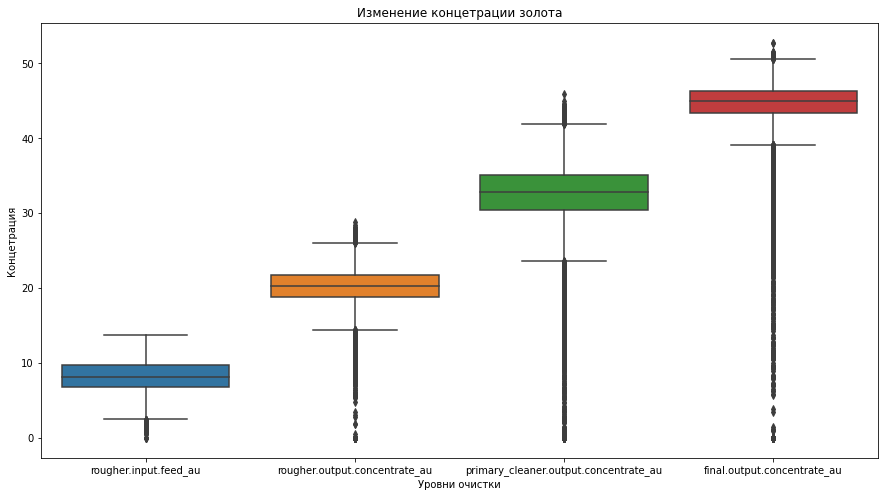

In [218]:
df_au = pd.DataFrame(data=df, columns=['rougher.input.feed_au','rougher.output.concentrate_au',
                                       'primary_cleaner.output.concentrate_au','final.output.concentrate_au'])
plt.figure(figsize=(15,8))
boxplot=sns.boxplot(x="variable", y="value", data=pd.melt(df_au))
boxplot.axes.set_title("Изменение концетрации золота")
boxplot.set_xlabel("Уровни очистки")
boxplot.set_ylabel("Концетрация")
plt.show()

После всех этапов концетрация золота вырастает в 5 раз

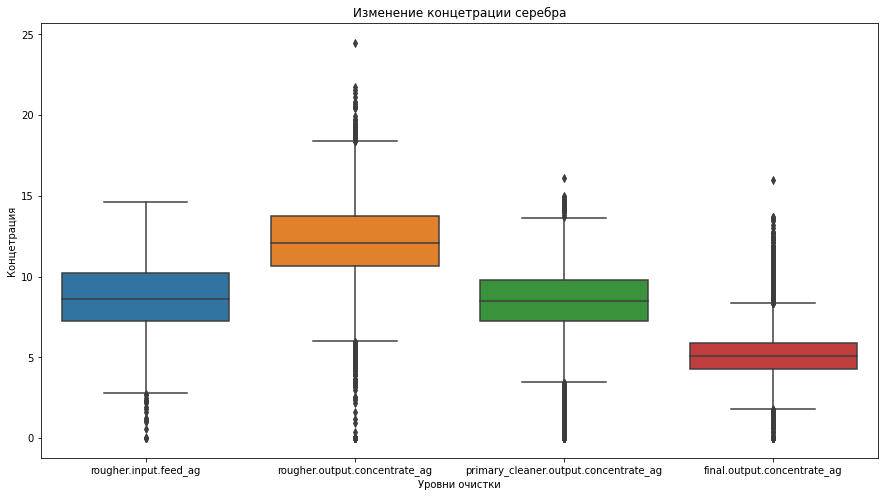

In [219]:
df_ag = pd.DataFrame(data=df, columns=['rougher.input.feed_ag','rougher.output.concentrate_ag',
                                       'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag'])
plt.figure(figsize=(15,8))
boxplot=sns.boxplot(x="variable", y="value", data=pd.melt(df_ag))
boxplot.axes.set_title("Изменение концетрации серебра")
boxplot.set_xlabel("Уровни очистки")
boxplot.set_ylabel("Концетрация")
plt.show()

Концетрация серебра возрастает после флотации, а после очистки падает.

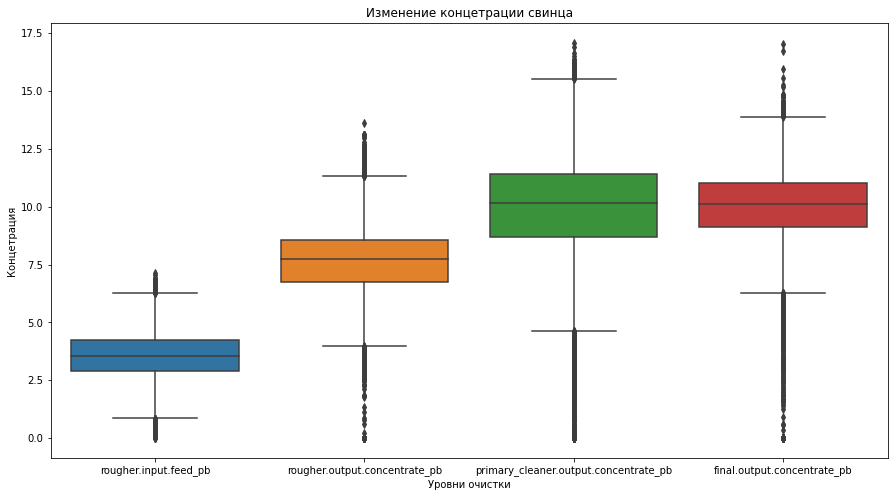

In [220]:
df_pb = pd.DataFrame(data=df, columns=['rougher.input.feed_pb','rougher.output.concentrate_pb',
                                       'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb'])
plt.figure(figsize=(15,8))
boxplot=sns.boxplot(x="variable", y="value", data=pd.melt(df_pb))
boxplot.axes.set_title("Изменение концетрации свинца")
boxplot.set_xlabel("Уровни очистки")
boxplot.set_ylabel("Концетрация")
plt.show()

Концетрация свинца растёт после флотации и первого этапа очистки.

In [221]:
df_test['type']='test'
df_train['type']='train'
feed_size = pd.concat([df_train[['rougher.input.feed_size','type']], df_test[['rougher.input.feed_size','type']]], axis=0)

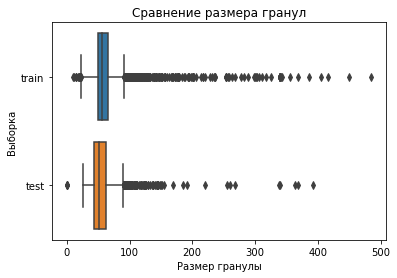

In [222]:
boxplot=sns.boxplot(x=feed_size['rougher.input.feed_size'], y=feed_size['type'])
boxplot.axes.set_title("Сравнение размера гранул")
boxplot.set_xlabel("Размер гранулы")
boxplot.set_ylabel("Выборка")
plt.show()

Медианы и 25/75 квантили близки по значениям, следовательно распределение показателя в выборках не сильно отличаются.

In [223]:
df['rougher.input.concentrate_all_metals']=df['rougher.input.feed_au']+df['rougher.input.feed_ag']+df['rougher.input.feed_pb']
df['rougher.output.concentrate_all_metals']=df['rougher.output.concentrate_au']+df['rougher.output.concentrate_ag']+\
    df['rougher.output.concentrate_pb']
df['primary_cleaner.output.concentrate_all_metals']=df['primary_cleaner.output.concentrate_au']+\
    df['primary_cleaner.output.concentrate_ag']+df['primary_cleaner.output.concentrate_pb']
df['final.output.concentrate_all_metals']=df['final.output.concentrate_au']+\
    df['final.output.concentrate_ag']+df['final.output.concentrate_pb']

In [224]:
df_all_metals = pd.DataFrame(data=df, columns=['rougher.input.concentrate_all_metals','rougher.output.concentrate_all_metals',
                                       'primary_cleaner.output.concentrate_all_metals','final.output.concentrate_all_metals'])

In [225]:
df_all_metals['rougher.input.concentrate_all_metals'].median()

20.185052048700843

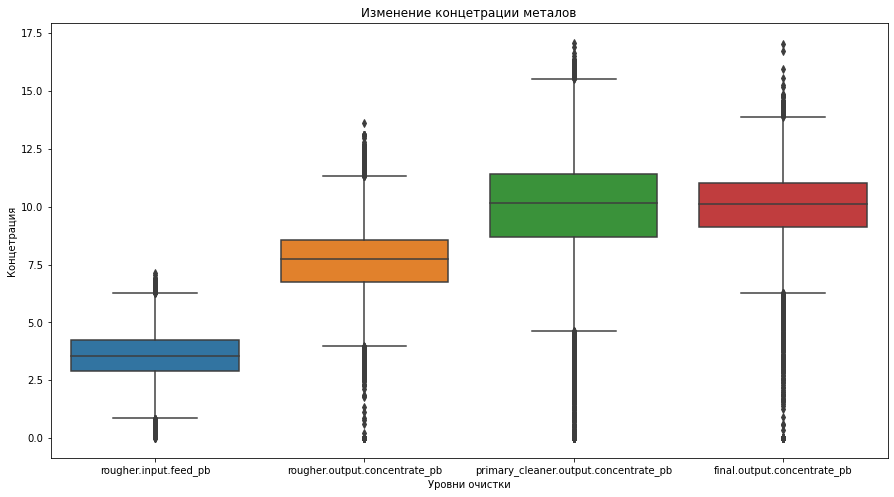

In [226]:
plt.figure(figsize=(15,8))
boxplot=sns.boxplot(x="variable", y="value", data=pd.melt(df_pb))
boxplot.axes.set_title("Изменение концетрации металов")
boxplot.set_xlabel("Уровни очистки")
boxplot.set_ylabel("Концетрация")
plt.show()

После флотации концетрация металов вырастает в 2-3 раза. Последующая очистка даёт меньший эффект, но повышает медианную концетрацию до 10%. Весь процесс очистки увеличивает (медианную) концетрацию металлов с 3% до 10%.

In [227]:
df_list=[]
for i in range(0,len(df_all_metals.columns)):
    Q1 = df_all_metals[df_all_metals.columns[i]].quantile(0.25)
    Q3 = df_all_metals[df_all_metals.columns[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df_list.append(df_all_metals[(df_all_metals[df_all_metals.columns[i]] > lower) & 
                                 (df_all_metals[df_all_metals.columns[i]] < upper)][df_all_metals.columns[i]])

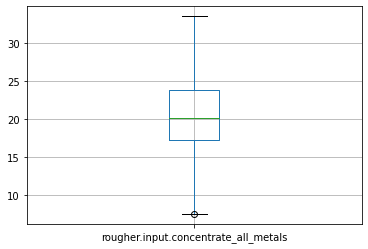

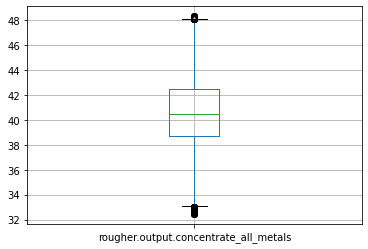

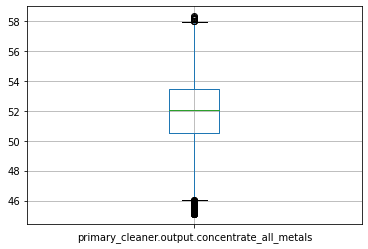

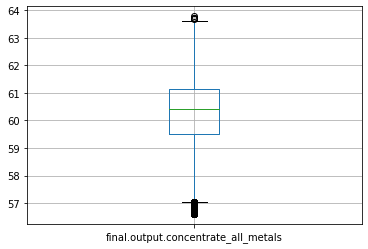

In [228]:
for i in range(0, len(df_list)):
    pd.DataFrame(df_list[i]).boxplot()
    plt.show()

## Модель

Напишем функцию для итоговой оценки качества.

In [230]:
def sMAPE(terget, predict):
    return((abs(terget-predict)/((abs(terget)+abs(predict))/2)).sum()/len(terget))*100

### Модель для этапа флотации

In [231]:
linear_model= LinearRegression()

In [233]:
scoring=make_scorer(sMAPE,greater_is_better=False)

In [234]:
scores = cross_val_score(linear_model, features_rougher_train, target_rougher_train, cv=5,scoring=scoring)
print(scores.mean())

-6.690459741299781


In [236]:
#случайный лес
forest_model= RandomForestRegressor(random_state=12345)

In [237]:
parameters_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 50]
}

In [238]:
%%time
grid_cv = GridSearchCV(forest_model, parameters_grid, scoring = scoring, cv = 3, n_jobs=-1)
grid_cv.fit(features_rougher_train, target_rougher_train)

Wall time: 1min 5s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 50],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [239]:
best_model=grid_cv.best_estimator_
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 20, 'n_estimators': 50}
-8.082207807972429


Случайный лес несколько уступает линейной регрессии по качеству.

In [242]:
#попробуем градиентный бустинг с параметрами по умолчанию
model=GradientBoostingRegressor()

In [243]:
scores = cross_val_score(model, features_rougher_train, target_rougher_train, cv=5,scoring=scoring)
print(scores.mean())

-6.920918778770907


In [245]:
#ещё дерево посмотрим
model=DecisionTreeRegressor(random_state=12345)

In [246]:
parameters_grid = {
    'max_depth': list(range(5, 100,5))
}

In [247]:
%%time
grid_cv = GridSearchCV(model, parameters_grid, scoring = scoring, cv = 3, n_jobs=-1)
grid_cv.fit(features_rougher_train, target_rougher_train)

Wall time: 1.85 s


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                       55, 60, 65, 70, 75, 80, 85, 90, 95]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [248]:
best_model_tree=grid_cv.best_estimator_
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 5}
-9.086587540420132


Итого по первой моделе:
- Линейная регрессия показала качество выше, чем другие модели. Для итогового предсказания берем линейную регрессию

### Модель для этапа очистки

Теперь всё те же шаги проделываем для следующего этапа

In [251]:
model= LinearRegression()
scores = cross_val_score(model, features_cleaner_train, target_final_train, cv=5,scoring=scoring)
print(scores.mean())

-9.811324246955156


In [253]:
#случайный лес
model= RandomForestRegressor(random_state=12345)
parameters_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 50]
}

In [254]:
%%time
grid_cv = GridSearchCV(model, parameters_grid, scoring = scoring, cv = 3, n_jobs=-1)
grid_cv.fit(features_cleaner_train, target_final_train)

Wall time: 1min 49s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 50],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [255]:
best_model=grid_cv.best_estimator_
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 10, 'n_estimators': 200}
-14.531768953915945


In [258]:
#попробуем градиентный бустинг с параметрами по умолчанию
model=GradientBoostingRegressor()

In [259]:
scores = cross_val_score(model, features_cleaner_train, target_final_train, cv=5,scoring=scoring)
print(scores.mean())

-11.36411911099762


In [261]:
#ещё дерево посмотрим
model=DecisionTreeRegressor(random_state=12345)

In [262]:
parameters_grid = {
    'max_depth': list(range(5, 100,5))
}

In [263]:
%%time
grid_cv = GridSearchCV(model, parameters_grid, scoring = scoring, cv = 3, n_jobs=-1)
grid_cv.fit(features_cleaner_train, target_final_train)

Wall time: 2.6 s


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                       55, 60, 65, 70, 75, 80, 85, 90, 95]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [264]:
best_model_tree=grid_cv.best_estimator_
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 5}
-15.452080341550946


Итого по этапу очистки:
- Для этапа очистки так же лучшее качество показала линейная регрессия

In [272]:
model_rougher=LinearRegression()
model_cleaner=LinearRegression()

In [273]:
model_rougher.fit(features_rougher_train,target_rougher_train)
model_cleaner.fit(features_cleaner_train,target_final_train)
predict_rougher=model_rougher.predict(features_rougher_test)
predict_cleaner=model_cleaner.predict(features_cleaner_test)

In [274]:
#print('Итоговая оценка качество модели:',sMAPE(model_rougher,model_cleaner, features_rougher_test_scale, target_rougher_test, features_cleaner_test_scale, 
#      target_final_test))

In [275]:
print('Итоговая оценка качество модели:',sMAPE(target_rougher_test, predict_rougher)*0.25+0.75*
      sMAPE(target_final_test, predict_cleaner))

Итоговая оценка качество модели: 7.720532811782432


In [276]:
predict_rougher_dummy = pd.Series([target_rougher_train.median()]*len(features_rougher_test),
                                  index = features_rougher_test.index)

In [277]:
predict_cleaner_dummy = pd.Series([target_final_train.median()]*len(features_cleaner_test),
                                  index = features_cleaner_test.index)

In [278]:
print('Итоговая оценка качество модели по константной молели:',sMAPE(target_rougher_test, predict_rougher_dummy)*0.25+0.75*
      sMAPE(target_final_test, predict_cleaner_dummy))

Итоговая оценка качество модели по константной молели: 7.465168321848635


Выводы:
- В рамках проекта мы исследовали процесс очистки золотоносной руды
- Задача состояла в предскзании эффективности обогащения руды на этапах флотации и после очистки.
- Т.к. таргет числово, то имеет место задача построения регрессии
- Провели предобрабоку даных и исследовали признаки
- Признаки разделили на 2 группы, в соответсвии с этапами очистки. Модель стром на соответсвующих признаках для этапа
- Обучили по 4 модели для каждого этапа: линейну регрессию, дерево решений, случайны лес и градиентный бустинг. В качестве итговой модели был выбран градиентный бустинг на обоих этапах
- Для итогоов йоценки качества была написана пользовательская функция оценки
- Ошибка на тестовой выборке составила 8,5%: 4,5% на этапе флотации и 9,9% на этапе очистки.